In [1]:
import gensim.downloader as api

In [2]:
wv = api.load('glove-twitter-25')

In [ ]:
wv.similarity('good', 'great')

In [ ]:
dir(wv)

In [ ]:
wv.most_similar('great')

In [ ]:
wv.doesnt_match(['car', 'bike', 'truck', 'child'])

In [ ]:
wv.doesnt_match(['car', 'bike', 'truck'])

In [ ]:
wv.most_similar(positive=['king', 'woman'], negative=['man'])

In [ ]:
wv.most_similar('number')

In [ ]:
wv['good'].shape

# News classification

In [3]:
import spacy
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
nlp = spacy.load('en_core_web_lg')

In [4]:
df1 = pd.read_csv(r"C:\Users\KIRUBA\Downloads\Fake.csv (1)\Fake.csv")

In [5]:
df2 = pd.read_csv(r"C:\Users\KIRUBA\Downloads\True.csv\True.csv")

In [6]:
df1['cat_num'] = 1
df2['cat_num'] = 0

In [7]:
df1 = df1.sample(1000)
df2 = df2.sample(1000)

In [8]:
df = pd.concat([df1, df2], axis = 'rows', ignore_index=True)

In [9]:
df.shape

(2000, 5)

In [10]:
df['cat_num'].value_counts()

cat_num
1    1000
0    1000
Name: count, dtype: int64

In [11]:
df.sample(2)

,title,text,subject,date,cat_num
1393,"Schaeuble to head German parliament, unblockin...",BERLIN (Reuters) - Germany took a first decisi...,worldnews,"September 27, 2017",0
1468,Trump meets former Vice President Gore in New ...,NEW YORK (Reuters) - U.S. President-elect Dona...,politicsNews,"December 5, 2016",0


In [12]:
df['title'][0]

' Friday’s New York Daily News Cover Perfectly Illustrates What The Trump ‘Presidency’ Has Done To America'

In [13]:
df = df[['title', 'cat_num']]

In [14]:
df.sample(4)

,title,cat_num
571,BILL O’REILLY ASKS TRUMP “Racist” Question Tha...,1
1499,"Senator McCain, visiting Pakistan, seeks bette...",0
199,Scooby Doo’s ‘Mystery Machine’ Involved In Cr...,1
118,WHAT THE MAINSTREAM MEDIA WON’T SHOW YOU: NEW ...,1


In [15]:
def preprocess(text):
    doc = nlp(text)
    word = []
    for i in doc:
        if i.is_stop or i.is_punct:
            continue
        else:
            word.append(i.lemma_)
    return wv.get_mean_vector(word)

In [17]:
preprocess("don't worry if ypu don't underdtand").shape

(25,)

In [18]:
df['vec'] = df['title'].apply(lambda x: preprocess(x))

In [19]:
df.sample(3)

,title,cat_num,vec
1471,Spain aims to avoid economic damage to Catalon...,0,"[0.06992269, 0.12023672, -0.18998487, 0.006003..."
1275,Former presidential rival Jeb Bush says he wil...,0,"[0.09316185, 0.14997199, -0.08035195, -0.07085..."
856,Cruz Campaign Blames Rubio For Loss: A Cruz/R...,1,"[0.07779152, 0.1993997, -0.21726069, 0.0832272..."


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['vec'].values, df['cat_num'], test_size=0.2, random_state=90)

In [23]:
x_train_tran = np.stack(x_train)
x_test_tran = np.stack(x_test)

In [27]:
x_test_tran.shape

(400, 25)

In [34]:
x_train_tran

array([[0.6172644 , 0.5107431 , 0.7051328 , ..., 0.5579591 , 0.52811474,
        0.67537665],
       [0.56039315, 0.5035017 , 0.42331532, ..., 0.5717546 , 0.5440492 ,
        0.5166532 ],
       [0.5200084 , 0.60595655, 0.6696312 , ..., 0.22091663, 0.66609526,
        0.5215108 ],
       ...,
       [0.61105347, 0.4317271 , 0.36590648, ..., 0.30962405, 0.2440607 ,
        0.68703324],
       [0.56619704, 0.65563345, 0.49127275, ..., 0.6489911 , 0.7527051 ,
        0.5392056 ],
       [0.65396076, 0.6735178 , 0.6318497 , ..., 0.38342187, 0.6328675 ,
        0.67923176]], dtype=float32)

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_train_tran = scaler.fit_transform(x_train_tran)
x_test_tran = scaler.transform(x_test_tran)

In [36]:
model = MultinomialNB()
model.fit(x_train_tran, y_train)

MultinomialNB()

In [37]:
model.score(x_test_tran, y_test)

0.8225

In [38]:
print(classification_report(y_test, model.predict(x_test_tran)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       203
           1       0.81      0.83      0.82       197

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [40]:
cm = confusion_matrix(y_test, model.predict(x_test_tran))

Text(50.722222222222214, 0.5, 'truth')

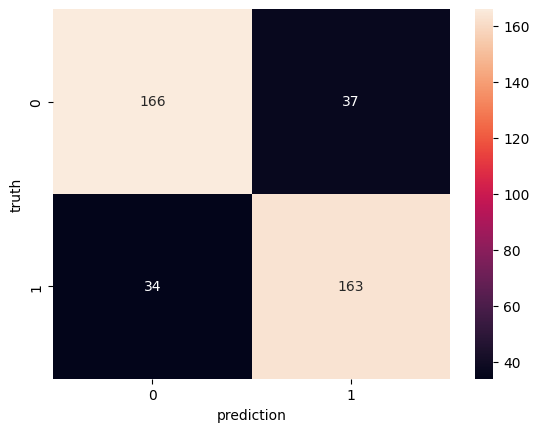

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('truth')